# Library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Data Input 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/pararawendy/dibimbing-materials/main/boston.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Instruction 

1. Split data: train - validate - test (point: 10)
2. Draw correlation plot on training data and perform feature selection on 
highly correlated features (point: 10)
3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10]) (point:50)
- Ridge regression (point: 25)
- LASSO (point: 25)
4. Choose the best lambda from the validation set (point: 20)
- Use RMSE as metric
- Interpret a sample of the coefficients of the best model
    - Ridge regression
    - LASSO
5. Evaluate the best models on the test data (+ interpretation) (point: 10)
- MAE
- MAPE
- RMSE

# Split Data 

In [3]:
feature = df.drop(columns='medv')
target = df[['medv']]

feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(
    feature, target, test_size=0.20, random_state=42)
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(
    feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

# Data Cleaning 

## Missing Value 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Duplicated Data 

In [9]:
df.duplicated().sum()

0

# Check Correlation Data 

## VIF Score 

In [4]:
X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
                     for i in range(X.shape[1])],
                     index = X.columns).reset_index()
vif_df.columns = ['features', 'vif_score']
vif_df = vif_df.loc[vif_df.features!='const']
vif_df

,features,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


There 4 features with high VIF Score:
1. `nox` with 4.585 point
2. `dis` with 4.390 point
3. `rad` with 7.182 point
4. `tax` with 8.268 point

## HeatMap 

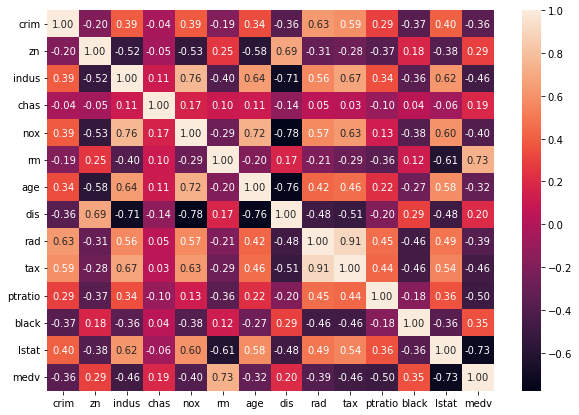

In [5]:
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Features in Cluster 
1. Cluster 1
    - Dis ==> Nox -0.78
    - Nox ==> Indus 0.76
    - Indus ==> Dis -0.71
2. Cluster 2 
    - Rad <==> Tax 0.98

Note:
- Including `Indus` feature in cluster 1 make a major impact on the VIF Score

Cluster correlation to Target
- Cluster 1:
    1. Nox to Medv -0.40
    2. Dis to Medv 0.20
    3. Indus to Medv -0.46
- Cluster 2
    1. Rad to Medv -0.39
    2. Tax to Medv -0.46

Observation:
- Unfortunately in this Data, the highest correlation score is 0.98 and the second is >0.7 for the feature with a high VIF Score.
- The highest correlation point is Tax and Indus, drop other cluster feature. 
- If not including Indus feature Dis will be drop.

## Drop Redundant Feature 

### Without indus

In [6]:
feature_df_test = feature_df_test.drop(columns=['rad','dis']) 
feature_df_train = feature_df_train.drop(columns=['rad','dis'])
feature_df_validation = feature_df_validation.drop(columns=['dis','rad'])

In [7]:
X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
                     for i in range(X.shape[1])],
                     index = X.columns).reset_index()
vif_df.columns = ['features', 'vif_score']
vif_df = vif_df.loc[vif_df.features!='const']
vif_df

,features,vif_score
1,crim,1.597096
2,zn,1.963389
3,indus,3.322304
4,chas,1.097962
5,nox,4.179655
6,rm,1.893609
7,age,2.805409
8,tax,3.185638
9,ptratio,1.787086
10,black,1.357444


- Without droping nox as the result nox VIF Score still >4

### With indus 

In [8]:
feature_df_test = feature_df_test.drop(columns=['nox']) 
feature_df_train = feature_df_train.drop(columns=['nox'])
feature_df_validation = feature_df_validation.drop(columns=['nox'])

In [10]:
X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
                     for i in range(X.shape[1])],
                     index = X.columns).reset_index()
vif_df.columns = ['features', 'vif_score']
vif_df = vif_df.loc[vif_df.features!='const']
vif_df

,features,vif_score
1,crim,1.596586
2,zn,1.832693
3,indus,2.970810
4,chas,1.078919
5,rm,1.891979
6,age,2.491050
7,tax,2.827854
8,ptratio,1.480472
9,black,1.346511
10,lstat,2.935815


- After droping nox for including indus, indus VIF Score dicrease to 2.9 point
- All VIF Scores on features do not exceed 3

# 3. Fit Models 

In [34]:
# Convert to Numpy
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train))

## Ridge 

In [35]:
# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

## Lasso 

In [36]:
# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_df_train, y_df_train)
lasso_reg_pointone.fit(X_df_train, y_df_train)
lasso_reg_one.fit(X_df_train, y_df_train)
lasso_reg_ten.fit(X_df_train, y_df_train)

Lasso(alpha=10, random_state=42)

# 4. The Best Lambda 

In [37]:
# Convert to Numpy
X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation))

## RMSE Ridge 

In [38]:
alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.100886202642037
RMSE of Ridge regression model with alpha = 0.1 is 5.100288438419682
RMSE of Ridge regression model with alpha = 1.0 is 5.094521787042944
RMSE of Ridge regression model with alpha = 10 is 5.051662075103159


Observation:
- The best Lambda in Ridge Regression is 10 with RMSE point is 5.051 

In [39]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,7.068423
1,crim,-0.052216
2,zn,-0.007855
3,indus,0.034094
4,chas,2.061822
5,rm,5.041802
6,age,0.020313
7,tax,-0.000312
8,ptratio,-0.845843
9,black,0.012919


Observation:
- Every 1 point increase in Criminal Rate `crim` will reduce the house price by 0.052. 
- For every 1 room `rm` in the house, the price will increase by 5.041. 

## RMSE Lasso

In [40]:
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.097514590498467
RMSE of Lasso regression model with alpha = 0.1 is 5.08016984806439
RMSE of Lasso regression model with alpha = 1.0 is 4.988309999786155
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


Observation:
- The Best Lambda in Lasso Regression is 1.0 with RMSE point is 4.988

In [41]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)})

coef_df

,feature,coefficient
0,intercept,22.945673
1,crim,-0.034953
2,zn,0.001941
3,indus,-0.000000
4,chas,0.000000
5,rm,2.572882
6,age,0.041419
7,tax,-0.001003
8,ptratio,-0.757735
9,black,0.011371


Observation:
- When all value of features is 0, the expected price of the house is 22.94
- Every 1 point increase in Residential Land will increase the house price by 0.001.

### The Best Lambda between Ridge Regression and Lasso Regression is Lasso Regression with Lambda 1.0 and RMSE Point is 4.988

# 5. Evaluate the best models on the test data 

In [42]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test))

In [43]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 5.3156467257341
MAE for testing data is 3.535684907677295
MAPE for testing data is 0.18439385451147536


Observation:
- RMSE: The residual deviate between +-5.31. From range 5-50 this point is acceptable because +-10% from the range. 
- MAE: On average prediction deviates from the true price `medv` by 3.53.
- MAPE: 18% deviation relative to the true price `medv` which means the model is tolerable for the data.